In [25]:
# library imports
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "Logistic Regression",
    "XGBoost",
    "SGD",
    "Gradient Boosting Classifier"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(), # kernel = "rbf" by default
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

# Iterate over classifiers

In [28]:
# supress warnings - as we use deault values, some classifiers give warnings. Mainly logistic regression and Linear Discriminant analysis.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We use compliance_2020 for algorithm evaluation because test data does not have prediction value for compliance_2021.

In [48]:
train_df = pd.read_csv("../clean_data/train_part_impute_mean.csv")
test_df = pd.read_csv("../clean_data/test_part_impute_mean.csv")

In [49]:
X_test = test_df.drop(['compliance_2020'], axis=1) #test_df.iloc[:,:27] 
y_test = test_df['compliance_2020'] 

X_train = train_df.drop(['compliance_2020', 'compliance_2021'], axis=1) #train_df.iloc[:,:27]
y_train = train_df['compliance_2020'] 

Beacuse some of the classifiers have very varying results depending on the random state, we run them trough 100 iterations to get their average accuracy score. We use accuracy score to compare algorihtms.

In [50]:
iterations = 100
results = {}
time_result = {}


for i in range(iterations):
    for classifier_name, classifer in zip(names, classifiers):
            start_time = time.time()
            classifer.fit(X_train, y_train)
            score = classifer.score(X_test, y_test)
            end_time = time.time()
            totalTime = end_time - start_time
            if classifier_name in results:
                results[classifier_name].append(score)
                time_result[classifier_name].append(totalTime)
            else:
                results[classifier_name] = [score]
                time_result[classifier_name] = [totalTime]


[03:30:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:30:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:30:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:30:43] WARNING: /tmp/abs_40obctay9q/croots/recip

[03:31:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:22] WARNING: /tmp/abs_40obctay9q/croots/recip

[03:31:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:55] WARNING: /tmp/abs_40obctay9q/croots/recip

[03:32:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:32:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:32:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:32:26] WARNING: /tmp/abs_40obctay9q/croots/recip

In [51]:
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
end_time = time.time()
totalTime = end_time - start_time
print(totalTime)

0.3429677486419678


# Plot classifier accuracy

First we plot all classifier scores over 100 iterations, to see how they vary.

Text(0.5, 1.0, 'Classifier accuracy: 100 iterations')

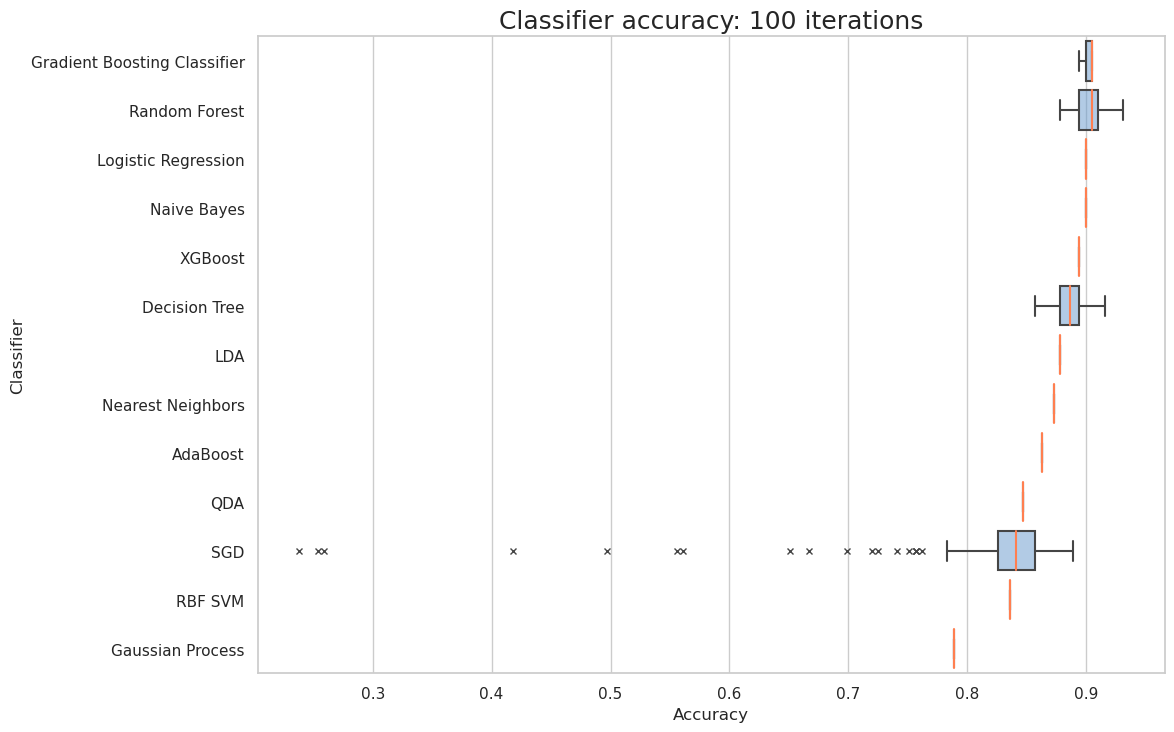

In [52]:
rows = []
for name in names:
    for row in results[name]:
        rows.append([name, row])
d = pd.DataFrame(rows, columns=['Classifier', 'Accuracy'])

grouped = d.loc[:,['Classifier', 'Accuracy']] \
    .groupby(['Classifier']) \
    .median() \
    .sort_values(by='Accuracy', ascending = False)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid") 

sns.boxplot(data=d, x="Accuracy", y="Classifier", order = grouped.index,
           flierprops={"marker": "x"},
           boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           ).set_title('Classifier accuracy: 100 iterations', fontsize=18)

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

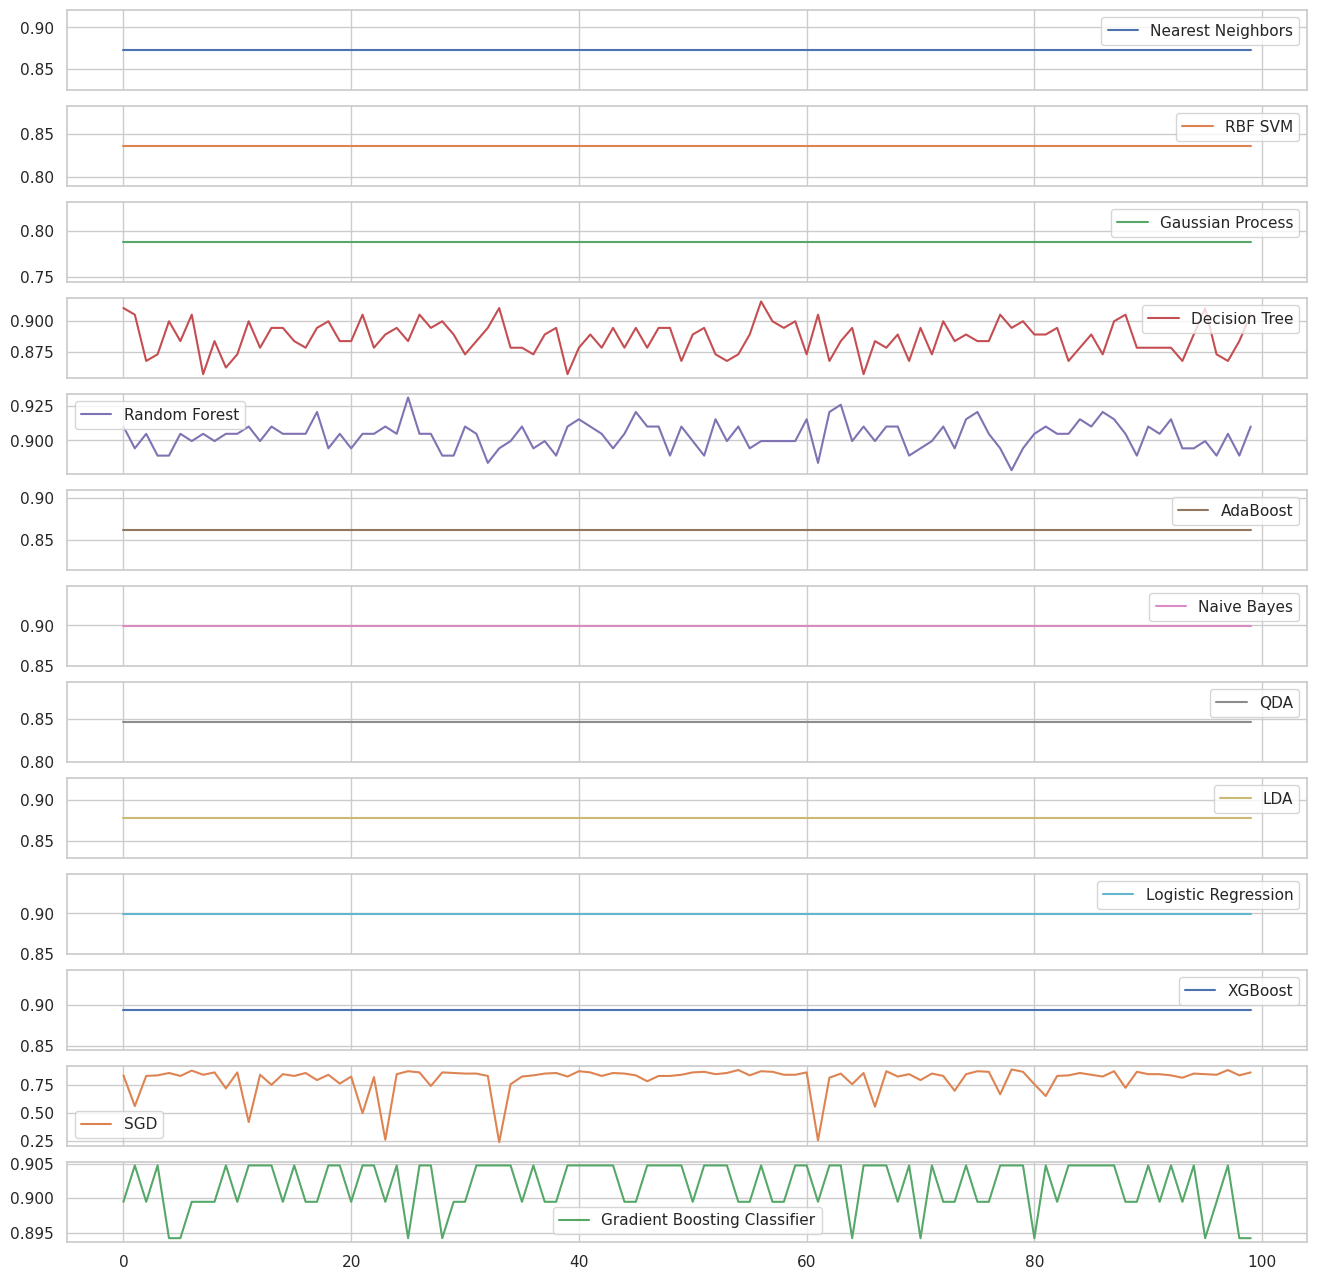

In [53]:
my_df = pd.DataFrame(data=results, columns=names)
my_df.plot(subplots=True, layout=(13,1), figsize=(16,16))

To compare classifier scores, we plot them to a single plot.

<AxesSubplot:>

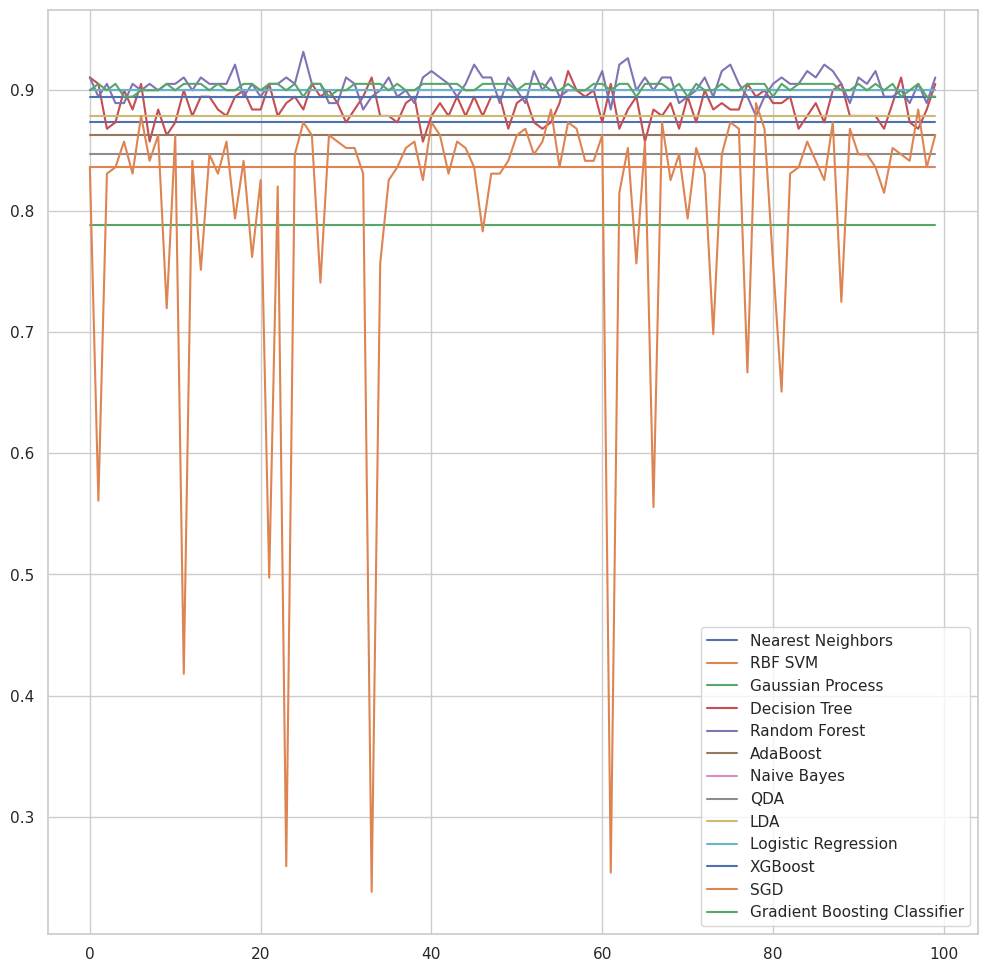

In [54]:
my_df.plot(figsize=(12,12))

# Plot classifer runtime

Text(0.5, 1.0, 'Classifier runtime: 100 iterations')

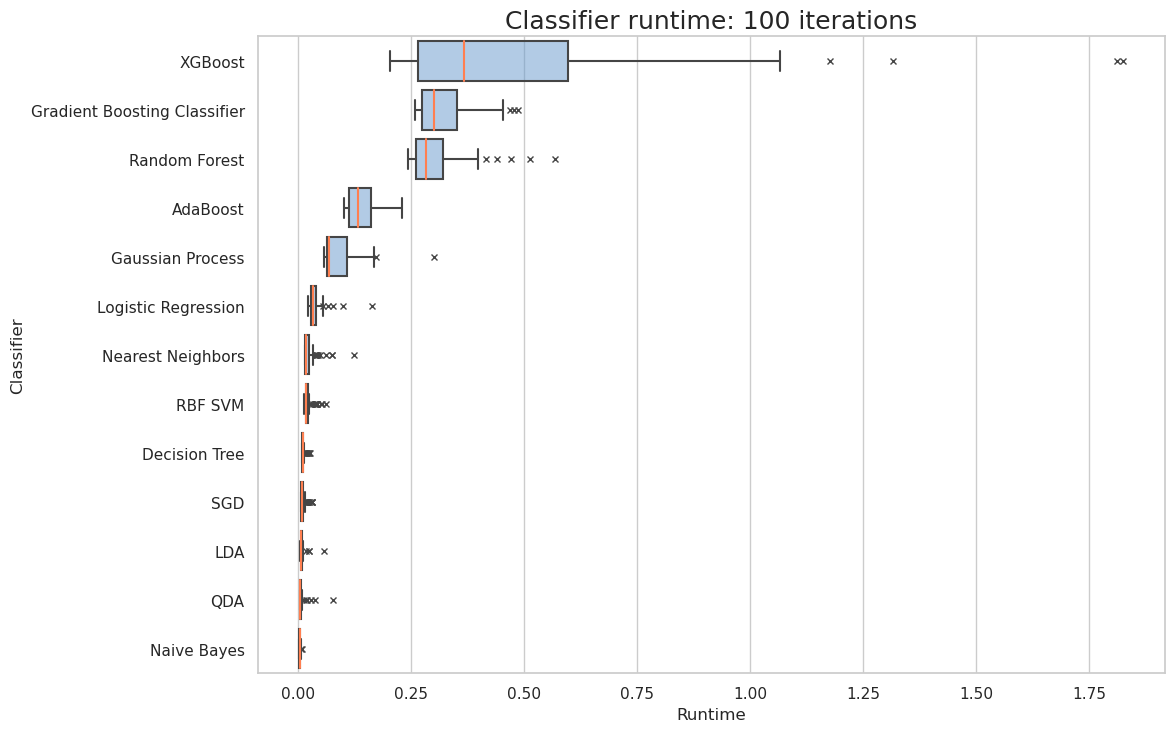

In [55]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df = time_df.melt(ignore_index=False)
time_df = time_df.rename(columns={'variable': 'Classifier', 'value': 'Runtime'}) 

grouped = time_df.loc[:,['Classifier', 'Runtime']] \
    .groupby(['Classifier']) \
    .median() \
    .sort_values(by='Runtime', ascending = False)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid") 

sns.boxplot(data=time_df, x="Runtime", y="Classifier", order = grouped.index,
           flierprops={"marker": "x"},
           boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           ).set_title('Classifier runtime: 100 iterations', fontsize=18)

<AxesSubplot:>

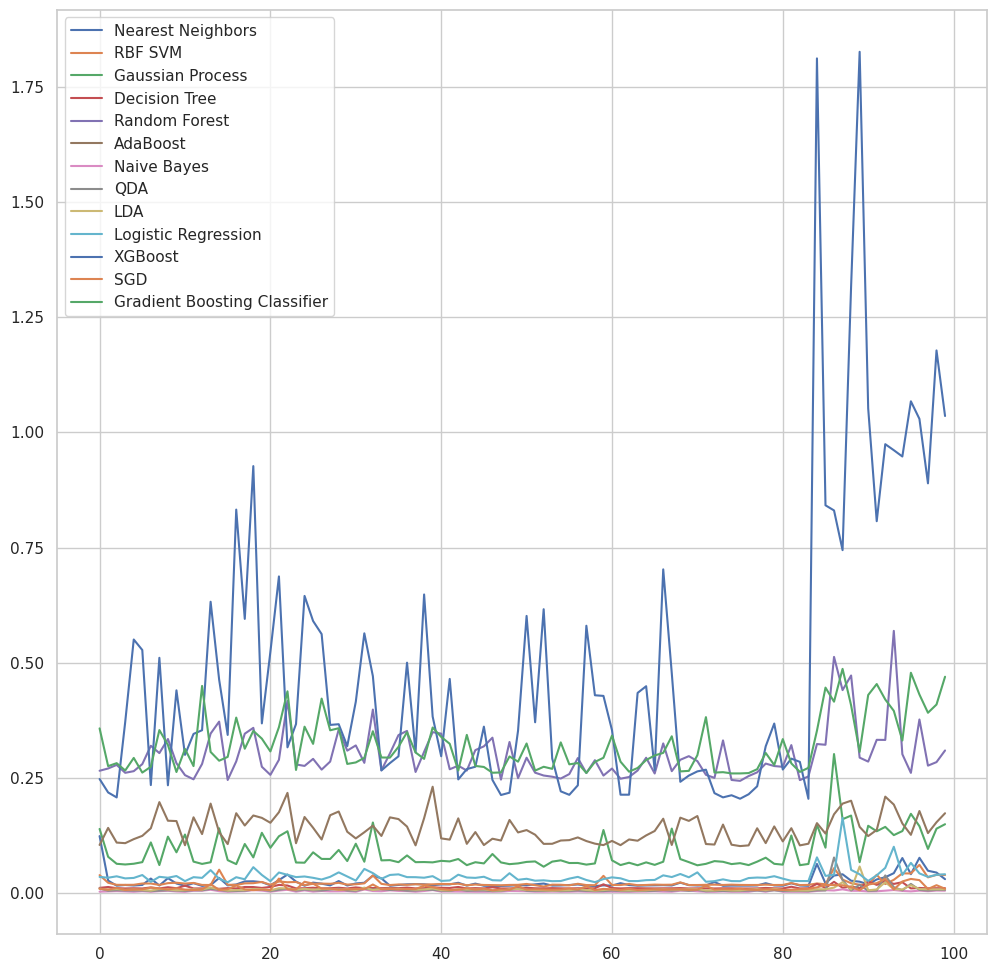

In [56]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df.plot(figsize=(12,12))

# How long one run took on average

In [57]:
time_mean_results = []
for key in names:
    mean = np.array(time_result[key]).mean()
    time_mean_results.append(mean)
    
timeMeanDf = pd.DataFrame(data=[time_mean_results], columns=names).T.sort_values(by=0, ascending=False)
timeMeanDf

,0
XGBoost,0.489894
Gradient Boosting Classifier,0.322093
Random Forest,0.299559
AdaBoost,0.138783
Gaussian Process,0.089565
Logistic Regression,0.037133
Nearest Neighbors,0.024504
RBF SVM,0.022494
Decision Tree,0.012285
SGD,0.011157


... median

In [58]:
time_median_results = []
for key in names:
    median = np.median(time_result[key])
    time_median_results.append(median)
    
timemedianDf = pd.DataFrame(data=[time_median_results], columns=names).T.sort_values(by=0, ascending=False)
timemedianDf

,0
XGBoost,0.367567
Gradient Boosting Classifier,0.301916
Random Forest,0.283679
AdaBoost,0.132566
Gaussian Process,0.069384
Logistic Regression,0.034312
Nearest Neighbors,0.019083
RBF SVM,0.018847
Decision Tree,0.010920
SGD,0.008613


# How long 100 iterations took per classifier

In [59]:
time_sum_results = []
for key in names:
    summed = np.array(time_result[key]).sum()
    time_sum_results.append(summed)
    
timeSumDf = pd.DataFrame(data=[time_sum_results], columns=names).T.sort_values(by=0, ascending=False)
timeSumDf

,0
XGBoost,48.989397
Gradient Boosting Classifier,32.209284
Random Forest,29.955875
AdaBoost,13.878260
Gaussian Process,8.956522
Logistic Regression,3.713307
Nearest Neighbors,2.450363
RBF SVM,2.249387
Decision Tree,1.228548
SGD,1.115713


# Average accuracy of each classifier based on 100 runs

In [60]:
mean_results = []
for key in names:
    mean = np.array(results[key]).mean()
    mean_results.append(mean)
    
meanDf = pd.DataFrame(data=[mean_results], columns=names).T.sort_values(by=0, ascending=False)
meanDf

,0
Random Forest,0.903228
Gradient Boosting Classifier,0.901852
Naive Bayes,0.899471
Logistic Regression,0.899471
XGBoost,0.894180
Decision Tree,0.886138
LDA,0.878307
Nearest Neighbors,0.873016
AdaBoost,0.862434
QDA,0.846561


# Median accuracy of each classifier based on 100 runs

In [61]:
median_results = []
for key in names:
    median = np.median(results[key])
    median_results.append(median)
    
medianDf = pd.DataFrame(data=[median_results], columns=names).T.sort_values(by=0, ascending=False)
medianDf

,0
Random Forest,0.904762
Gradient Boosting Classifier,0.904762
Naive Bayes,0.899471
Logistic Regression,0.899471
XGBoost,0.894180
Decision Tree,0.886243
LDA,0.878307
Nearest Neighbors,0.873016
AdaBoost,0.862434
QDA,0.846561


## Results

When looking only accuracies, it seems that the best performing classifier is [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). **But what about runtime?**  
Next, we are going to rank classifers based on how they ranked in accuracy and runtime leaderboards. The higher the accuracy, the higher the rank. The lower the runtime, the higher the rank.

In [62]:
runtime_df = timeMeanDf.copy()
runtime_df['runtime_rank'] = list(reversed(range(1, len(runtime_df) + 1))) # here higher runtime is worse, so we reverse
runtime_df.rename( columns={0 :'runtime'}, inplace=True )
runtime_df.index.name = 'Classifier'

accuracy_df = meanDf.copy()
accuracy_df['accuracy_rank'] = range(1, len(accuracy_df) + 1)
accuracy_df.rename( columns={0 :'accuracy'}, inplace=True )
accuracy_df.index.name = 'Classifier'


df_merged = pd.merge(runtime_df, accuracy_df, how='inner', on = 'Classifier')
df_merged['total_rank'] = df_merged.apply(lambda row: row.runtime_rank + row.accuracy_rank, axis=1)
df_merged['total_rank'] = df_merged['total_rank'].astype('int')
df_merged = df_merged.sort_values(by=['total_rank'])
df_merged = df_merged.reset_index(level=0)
df_merged

,Classifier,runtime,runtime_rank,accuracy,accuracy_rank,total_rank
0,Naive Bayes,0.004458,1,0.899471,3,4
1,LDA,0.008843,3,0.878307,7,10
2,Decision Tree,0.012285,5,0.886138,6,11
3,Random Forest,0.299559,11,0.903228,1,12
4,Logistic Regression,0.037133,8,0.899471,4,12
5,QDA,0.007766,2,0.846561,10,12
6,Gradient Boosting Classifier,0.322093,12,0.901852,2,14
7,Nearest Neighbors,0.024504,7,0.873016,8,15
8,SGD,0.011157,4,0.802116,12,16
9,RBF SVM,0.022494,6,0.835979,11,17


The top 5 classifers based on accuracy **and** runtime are LDA, QDA, Naive Bayes, Logistic Regression and Gradient Boosting Classifier. So, the table above shows that even though Gradient Boosting Classifer achieved the accuracy of 0.918974, the LDA classifer performed only 1% worse (0.008 points), but achieved the result 37.6 times faster (0.221434/0.005883). 

While this is a great and quite an easy way to see the runtime vs accuracy tradeoff, in our case the evaluation metric for this Kaggle competition is only accuracy. Additionally, due to the nature of our dataset, i.e it being quite lightweight and not having much rows, we can afford for the model to train longer until it outputs a better accuracy and therefore, we can afford to run "slower" models. If we had a significantly larger dataset (or the data would be constantly added), then this accuracy-runtime tradeoff would have to be taken into account.

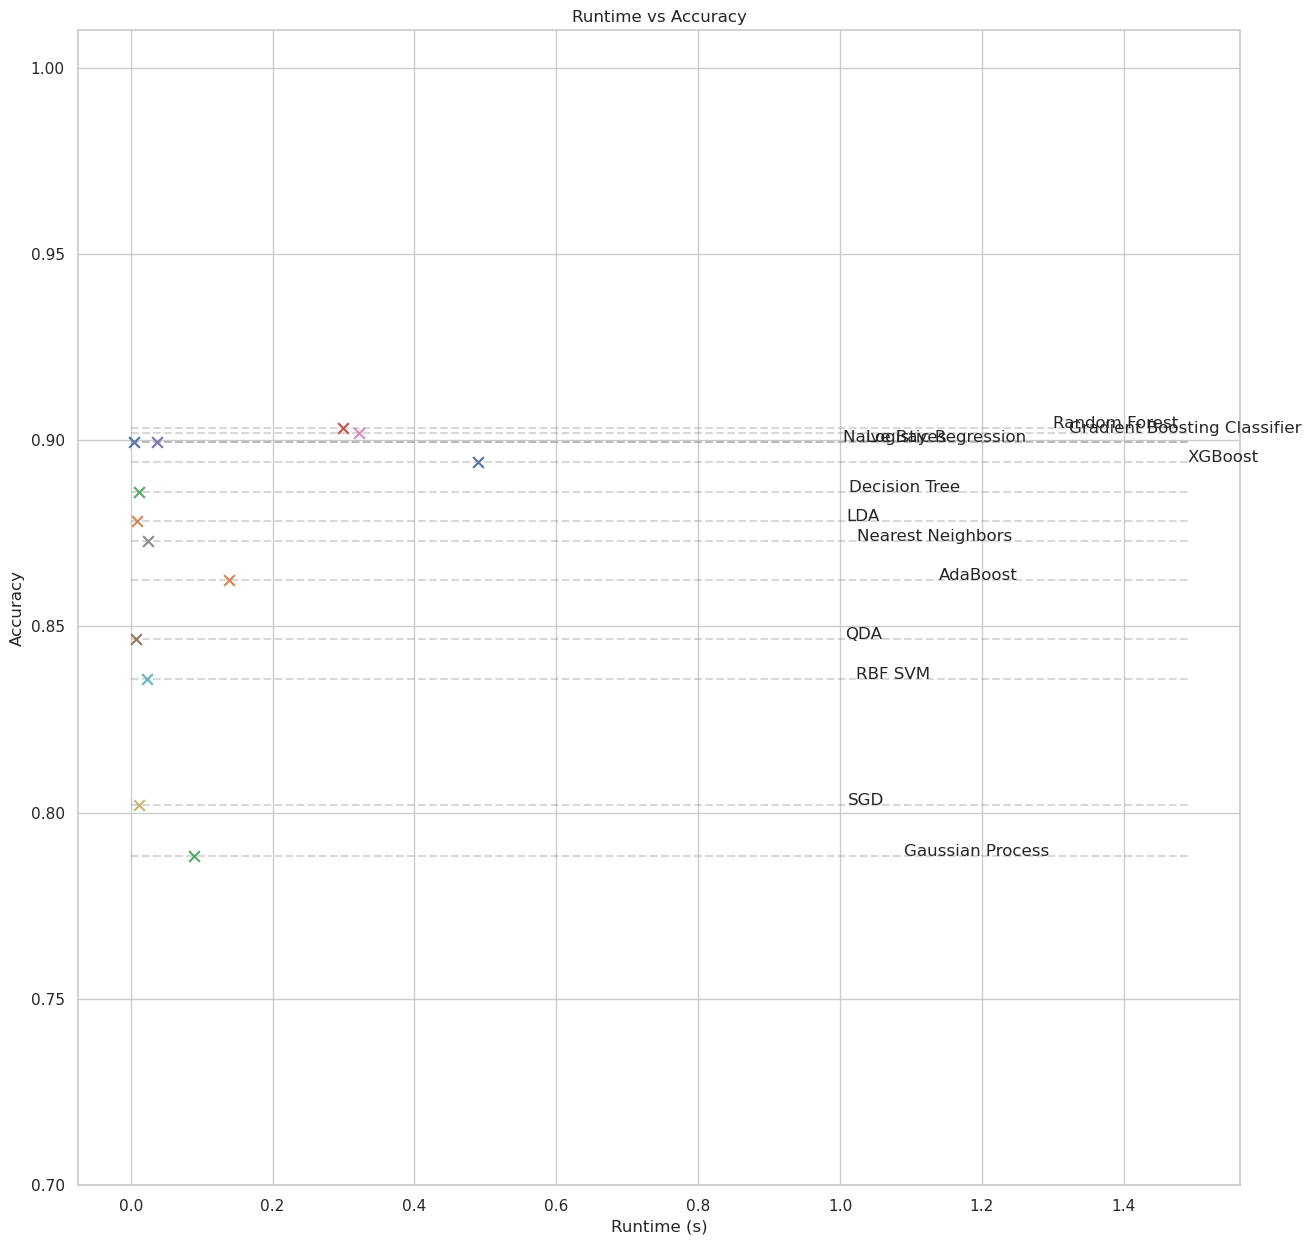

In [63]:
plt.figure(figsize = [15, 15])

for i in range(len(df_merged)):
    # Add classifier values
    plt.scatter(df_merged['runtime'][i], 
            df_merged['accuracy'][i], 
            label = df_merged['Classifier'][i],
               marker = 'x',
               s = 60)
    # Add a dashed lined marking the best accuracy threshold for classifier
    plt.hlines(y = df_merged['accuracy'][i], 
               xmin=0, 
               xmax = np.max(df_merged['runtime'])+1,
              linestyles = 'dashed', alpha = 0.3, color = 'grey')
    # Add classifier name
    plt.annotate(df_merged['Classifier'][i], 
                 (df_merged['runtime'][i]+1, 
                  df_merged['accuracy'][i]),
                )
plt.ylim(bottom = 0.70, top = 1.01)
plt.xlabel('Runtime (s)')
plt.ylabel('Accuracy')
plt.title('Runtime vs Accuracy')
plt.show();

Save top5

In [64]:
top5 = ','.join(df_merged['Classifier'][:5])
text_file = open("top5.txt", "w")
n = text_file.write(top5)
text_file.close()
print(top5.split(','))

['Naive Bayes', 'LDA', 'Decision Tree', 'Random Forest', 'Logistic Regression']
